# Exercises from Session 9

1) Change the initial conditions to be on the order of [M]. What impact does this have on the solution? (Plot the lines again.)


2) Select two rate constants to change and document your modifications. What are the impacts on the chemical evolution and steady state concentration? 

3) Change the constants to be appropriate for 30 km. What do you notice about how much time it takes to reach steady state $O_3$ concentrations?


## 1)

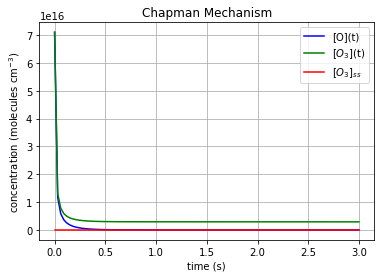

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants (found in S+P 5.1)
### concentration constants
M = 7.1e16
O2 = 0.21*M

### rate constants
jO2 = 5e-10 
jO3 = 1.9e-3
k2 = 9.1e-34
k4 = 2.2e-15

# Initial conditions
### guess based on the concentration of molecules in the atmosphere
initial_state = [M,M]

# Set the number of iterations and time period for simulation 
odeIterations = 100
endtime = 3
timeperiod = np.linspace(0.0, endtime, odeIterations)    


# Definition of system of ordinary differential equations
def deriv(conc, t):
     O = conc[0]
     O3 = conc[1]
     conc = [2*jO2*O2-k2*O*O2*M + jO3*O3-k4*O*O3, k2*O*O2*M - jO3*O3-k4*O*O3]
     return conc

# Use of scipy.integrate to function to solve 
sol = odeint(deriv, initial_state, timeperiod,mxstep=10000)

# Steady state value 
### Derived analytically considering the values of the rate constants and relative concentrations
O3ssval = 0.21*(k2*jO2/(k4*jO3))**0.5*M**1.5
O3ss = np.ones(len(timeperiod))*O3ssval

# Plot
plt.plot(timeperiod, sol[:,0], 'b', label='[O](t)')
plt.plot(timeperiod, sol[:,1], 'g', label='[$O_3$](t)')
plt.plot(timeperiod, O3ss,'r',label='[$O_3$]$_{ss}$')
plt.legend(loc='best')
plt.title('Chapman Mechanism')
plt.xlabel('time (s)')
plt.ylabel('concentration (molecules cm$^{-3}$)')
plt.grid()
plt.show()

If we change the initial conditions to be [M] instead of 1e-10*[M], initial concentration of [o] and $O_3$ increase several magnitudes. And the much more chemical beyond the steady state leads to sharpe decreas at the beginning.

## 2)

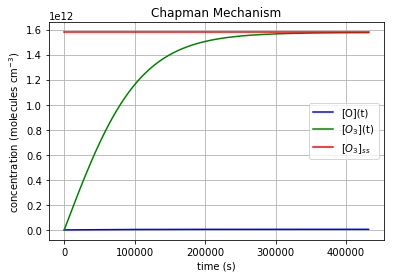

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants (found in S+P 5.1)
### concentration constants
M = 7.1e16
O2 = 0.21*M

### rate constants
jO2 = 5e-10 
jO3 = 1.9e-3
k2 = 6e-34
k4 = 1e-15

# Initial conditions
### guess based on the concentration of molecules in the atmosphere
initial_state = [1e-10*M,1e-10*M]

# Set the number of iterations and time period for simulation 
odeIterations = 1000
endtime = 3600*24*5
timeperiod = np.linspace(0.0, endtime, odeIterations)    


# Definition of system of ordinary differential equations
def deriv(conc, t):
     O = conc[0]
     O3 = conc[1]
     conc = [2*jO2*O2-k2*O*O2*M + jO3*O3-k4*O*O3, k2*O*O2*M - jO3*O3-k4*O*O3]
     return conc

# Use of scipy.integrate to function to solve 
sol = odeint(deriv, initial_state, timeperiod,mxstep=10000)

# Steady state value 
### Derived analytically considering the values of the rate constants and relative concentrations
O3ssval = 0.21*(k2*jO2/(k4*jO3))**0.5*M**1.5
O3ss = np.ones(len(timeperiod))*O3ssval

# Plot
plt.plot(timeperiod, sol[:,0], 'b', label='[O](t)')
plt.plot(timeperiod, sol[:,1], 'g', label='[$O_3$](t)')
plt.plot(timeperiod, O3ss,'r',label='[$O_3$]$_{ss}$')
plt.legend(loc='best')
plt.title('Chapman Mechanism')
plt.xlabel('time (s)')
plt.ylabel('concentration (molecules cm$^{-3}$)')
plt.grid()
plt.show()

k2 changes from 9.1e-34 to 6e-34,k4 changes form 2.2e-15 to 1e-15. Steady state concentration of $O_3$ and $O$ increase. The chemical evolution of $O_3$ becomes gentle and it needs more time to instect with the steady state line. 

## 3)

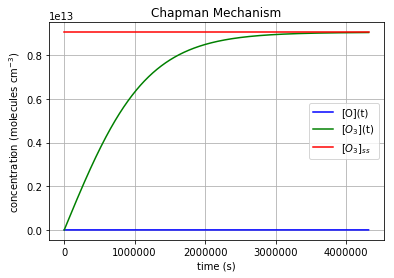

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants (found in S+P 5.1)
### concentration constants
M = 3.1e17
O2 = 0.21*M

### rate constants
jO2 = 6e-11
jO3 = 1.2e-3
k2 = 1.15e-33
k4 = 9.2e-16

# Initial conditions
### guess based on the concentration of molecules in the atmosphere
initial_state = [1e-10*M,1e-10*M]

# Set the number of iterations and time period for simulation 
odeIterations = 1000
endtime = 3600*24*50
timeperiod = np.linspace(0.0, endtime, odeIterations)    


# Definition of system of ordinary differential equations
def deriv(conc, t):
     O = conc[0]
     O3 = conc[1]
     conc = [2*jO2*O2-k2*O*O2*M + jO3*O3-k4*O*O3, k2*O*O2*M - jO3*O3-k4*O*O3]
     return conc

# Use of scipy.integrate to function to solve 
sol = odeint(deriv, initial_state, timeperiod,mxstep=10000)

# Steady state value 
### Derived analytically considering the values of the rate constants and relative concentrations
O3ssval = 0.21*(k2*jO2/(k4*jO3))**0.5*M**1.5
O3ss = np.ones(len(timeperiod))*O3ssval

# Plot
plt.plot(timeperiod, sol[:,0], 'b', label='[O](t)')
plt.plot(timeperiod, sol[:,1], 'g', label='[$O_3$](t)')
plt.plot(timeperiod, O3ss,'r',label='[$O_3$]$_{ss}$')
plt.legend(loc='best')
plt.title('Chapman Mechanism')
plt.xlabel('time (s)')
plt.ylabel('concentration (molecules cm$^{-3}$)')
plt.grid()
plt.show()

The time it takes to reach steady state $O_3$ concentrations increase from 300000s to 4000000s.